# Visualize revenue by cohorts with a layer-cake graph

This template helps you visualize revenues by acquisition cohort using a [layer-cake graph](https://www.custora.com/blog/story/visualizing-good-retention-and-bad-retention-in-retail). It provides valuable insights into your customer base around how older and newer customers contribute to your total revenues.

In [26]:
# Load packages
import pandas as pd
import plotly.express as px

In [27]:
# Upload your data as a CSV and load it as a data frame
df = pd.read_csv('data/payments.csv', parse_dates=['payment_date'])
df.head()

,payment_date,userid,price
0,2016-08-10 00:00:00+00:00,0014163a53056db3f10e,5000
1,2016-09-10 00:00:00+00:00,0014163a53056db3f10e,5000
2,2016-10-10 00:00:00+00:00,0014163a53056db3f10e,5000
3,2016-05-18 00:00:00+00:00,00164e47967b306239e8,5000
4,2016-06-07 00:00:00+00:00,0016e5b445a29e9cbfcc,5000


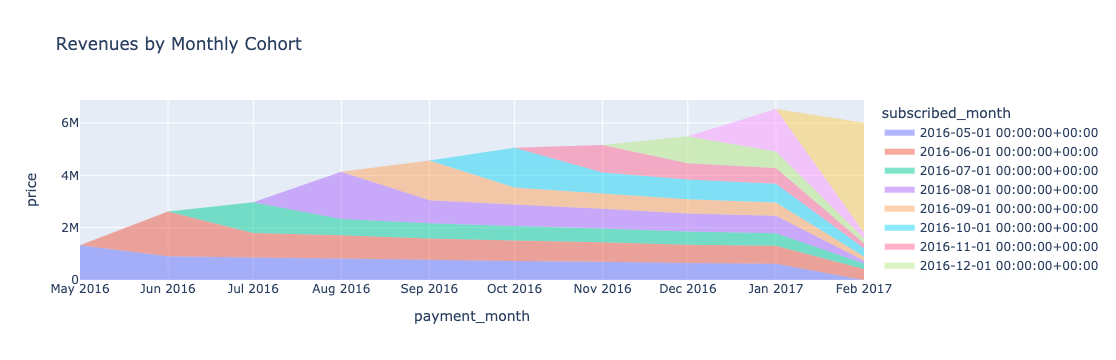

In [28]:
# Manipulate daily data to get payments by month and cohort.
df2 = df.copy()
df2['payment_month'] = df2['payment_date'] + pd.offsets.MonthBegin(-1)
df2['subscribed_date'] = df2.groupby(['userid'])['payment_date'].transform(min)
df2['subscribed_month'] = df2['subscribed_date'] + pd.offsets.MonthBegin(-1)
df_month = df2.groupby(['payment_month', 'subscribed_month'])[['price']].sum().reset_index()

# Visualize revenues by cohort as a layer-cake graph 
fig = px.area(
    df_month, 
    x='payment_month', 
    y='price', 
    color="subscribed_month", 
    line_group=None,
    color_discrete_sequence=px.colors.qualitative.Set1,
    title="Revenues by Monthly Cohort"
)
fig.update_traces(mode='none')
fig.show(config = {'displayModeBar': False})